## Exercise 1

The triangular distribution, in the interval (a, b), is given by the following:


 $ 
    f(X) = \left\{\begin{array}{lr}
        \frac{2(x-a)}{(b-a)(c-a)}, & \text{for } a\leq x\leq c\\
        \frac{2(b-x)}{(b-a)(b-c)}, & \text{for } c\leq x\leq b\\
        0, & \text{otherwise}
        \end{array}\right\} 
  $
  
 where c ∈ [a, b].
  
 a) plot the function, given the interval (a, b)

In [37]:
# We define the density function
f <- function(x, a, b, c) {
        if (a < c & c < b){
            result <- c()
            for (i in x){
                val <- if(i >= a & i <=c){2*(i-a)/((b-a)*(c-a))
                                        } 
                       else if (i > c & i <=b) {2*(b-i)/((b-a)*(b-c))
                                        } else 0
                result <- c(result, val)}
                                    return(result)
            }
        else {print('not valid interval')}
                           }
                      

In [38]:
a <- 1
b <- 6
c <- 3

x <- seq(a, b, 0.5)
triangle <- f(x, a, b, c)

df <- data.frame(x, triangle)

In [39]:
library(ggplot2)

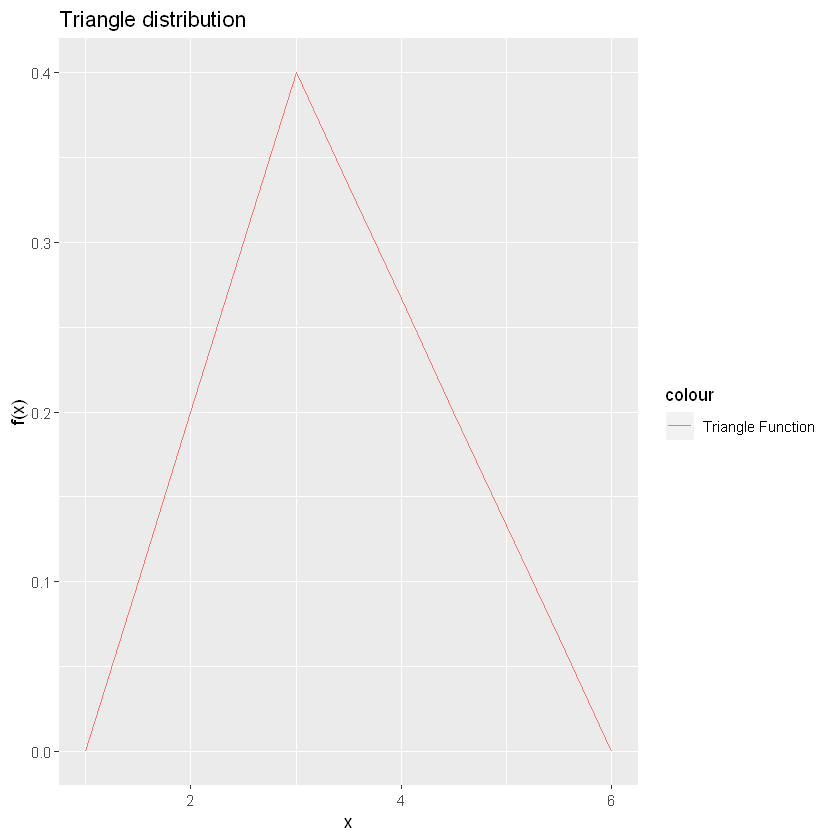

In [40]:
g <- ggplot(df,aes(x = x,y=triangle, col = 'Triangle Function'))+geom_line()+ggtitle("Triangle distribution")
g <- g + labs( y="f(x)", x = "x") 
g


b) and write an algorithm to generate random numbers from the triangular distribution

In [41]:
#The distribution function is given by
dounif <- function(x, a, b, c) {
        if (a < c & c < b){
            result <- c()
            for (i in x){
                val <- if(i >= a & i <=c){(i**2 -2*a*x+a**2)/((b-a)*(c-a))
                                        } 
                       else if (i > c & i <=b) {(-i**2 +2*b*x+a*c-a*b-c*b)/((b-a)*(b-c))
                                        } 
                       else if (i > b){1
                                      } else 0
                result <- c(result, val)}
                                    return(result)
            }
        else {print('not valid interval')}
                           }

In [42]:
#The cumulative function is given by inverting the function
qounif <- function(x, a, b, c) {
        if (a < c & c < b){
            result <- c()
            for (i in x){
                val <- if(i > 0 & i <= ((-a+c)/(b-a))){sqrt(i*(b-a)*(c-a)) +a
                                        } 
                       else if (i > ((-a+c)/(b-a)) & i <=1) {-sqrt(-i*(b-a)*(b-c)-c*b-a*b+a*c+b**2) +b
                       } 
                       else if (i > 1){1
                                      } else 0
                result <- c(result, val)}
                                    return(result)
            }
        else {print('not valid interval')}
                           }

In [43]:
rounif <- function(n, a, b, c) {
    us <- runif(n)
        if (a < c & c < b){
            result <- c()
            for (i in us){
                val <- if(i > 0 & i <= ((-a+c)/(b-a))){sqrt(i*(b-a)*(c-a)) +a
                                        } 
                       else if (i > ((-a+c)/(b-a)) & i <=1) {-sqrt(-i*(b-a)*(b-c)-c*b-a*b+a*c+b**2) +b
                       } 
                       else if (i > 1){1
                                      } else 0
                result <- c(result, val)}
                                    return(result)
            }
        else {print('not valid interval')}
                           }

c) generate 104 random number from the distribution, show them in an histogram and superimpose
the analytical curve

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""add" is not a graphical parameter"

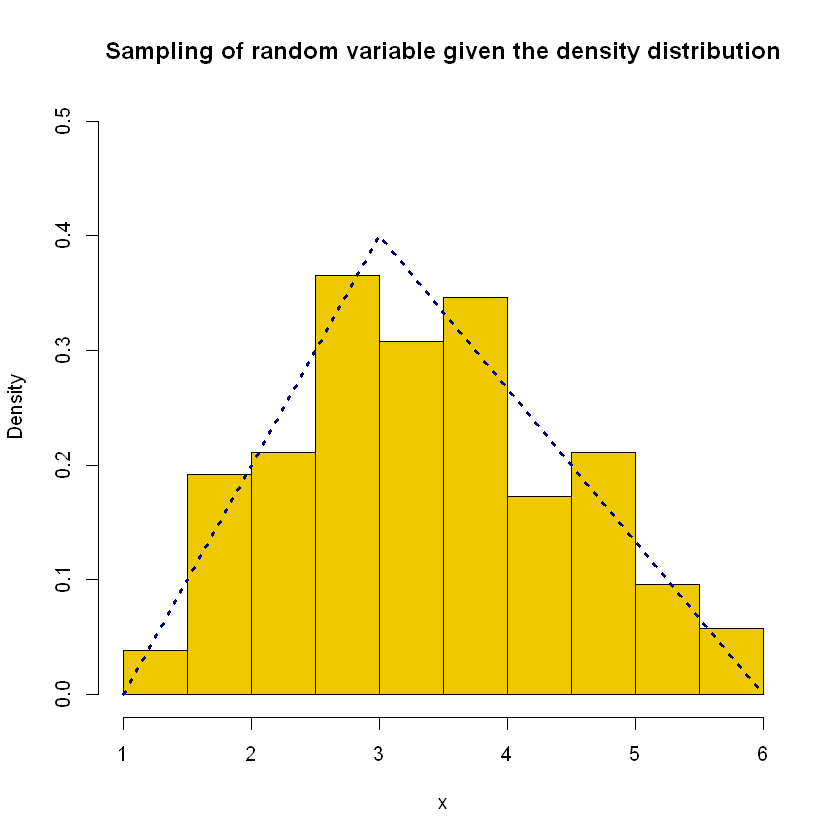

In [44]:
val <- rounif(104, a, b, c)
val <-val[val!=0] 

hist(val , breaks=seq(1,6,0.5), freq=FALSE ,
col="gold2", xlim=c(1, 6), xlab="x", ylim = c(0,0.5),
main="Sampling of random variable given the density distribution")
lines(x, triangle,  col="navy", lt=3, lw=3, add=TRUE)

## Exercise 2
Given a discrete probability distribution, defined by the following probabilities: 0.05, 0.19, 0.14,
0.17, 0.02, 0.11, 0.06, 0.05, 0.04, 0.17

a) plot the probability density function and the cumulative density function

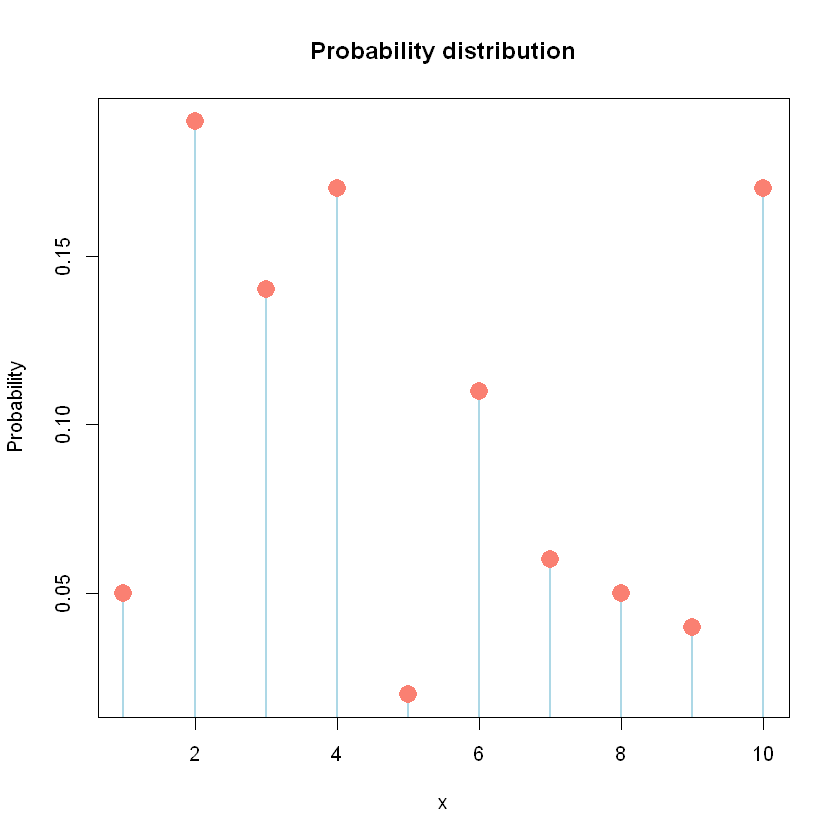

In [9]:
#For discrete distribution the probability density function is
prob <- c(0.05, 0.19, 0.14,0.17, 0.02, 0.11, 0.06, 0.05, 0.04, 0.17)
x <- 1:(length(prob))

plot(x, prob, type = "h", lwd = 2, col = "lightblue",
     ylab = "Probability", main = "Probability distribution")
points(x, prob, pch = 16, cex=2, col = "salmon")

The cumulative distribution function is given by 

$F(X_j) = P(X \leq x_j) = \sum_j p_j$

In [10]:
cumfunc = c()
for (i in 1:length(x)){
    var = sum(prob[1:i])
    print(var)
    cumfunc= append(cumfunc, sum(var))
}

[1] 0.05
[1] 0.24
[1] 0.38
[1] 0.55
[1] 0.57
[1] 0.68
[1] 0.74
[1] 0.79
[1] 0.83
[1] 1


In [11]:
library(ggthemes)

Warning message:
"package 'ggthemes' was built under R version 3.6.3"

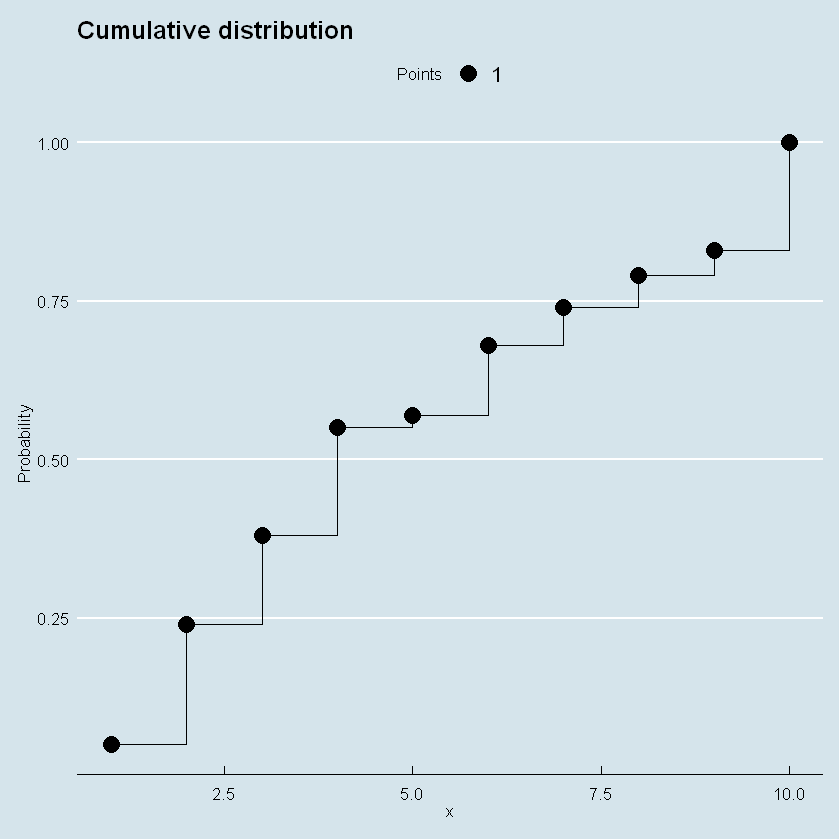

In [12]:
cum = data.frame(x, cumfunc)
g <- ggplot(cum, aes(x, cumfunc)) + geom_step() 
g <- g  +ggtitle("Cumulative distribution")+ theme_economist() + 
  scale_color_economist()
g <- g + geom_point(aes(x, cumfunc, size = 1))
g <- g + labs( y="Probability", x = "x", size = "Points")
g


b) write an algorithm to generate random numbers from the discrete probability distribution


 Assume that X is a discrete random variable such that $P(X=x_i)=p_i$. 
 The algorithm proceeds as follows:
1. Generate $U∼Unif(0,1)$
2. Determine the index k such that $\sum^{k−1}_{j=1}p_j \leq U \leq \sum^{k}_{j=1}p_j$ , and return $X=x_k$.

In [13]:
random <- function(n, cum) {
   #We create uniform distributed random var between 0,1
    U <- runif(n, min=0,max = 1)
    
    X <- rep(0,n) 
    
    #all the runif that lands in the first interval takes the value of p
    w1 <- which(U <= cum[1])
    X[w1] <- 1
    
    for (i in 1:(length(cum)-1)){
            wi <- which( (U > cum[i]) & (U < cum[i:i+1]) )
            X[wi] <-i+1}
    
    return(X)
    }

In [14]:
#Generate random data
rand <- random(5000, cumfunc)
df <- data.frame(x, rand, prob)

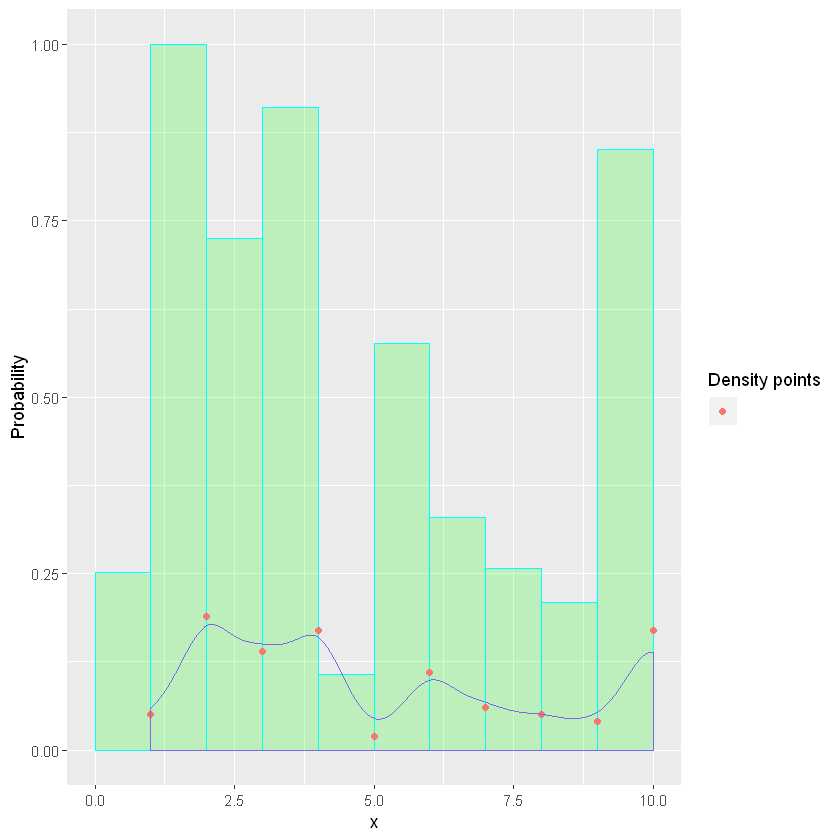

In [15]:
p<-ggplot(df, aes(x=rand, color=x))
p <- p + geom_histogram(aes(y = ..ncount..),breaks=seq(0, 10, by = 1), col="cyan", fill="green", alpha = .2) 
p <- p + geom_point(aes(x, prob, col = "")) + geom_density(col = "slateblue2") + labs( y="Probability", x = "x", col = "Density points")
p

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""add" is not a graphical parameter"

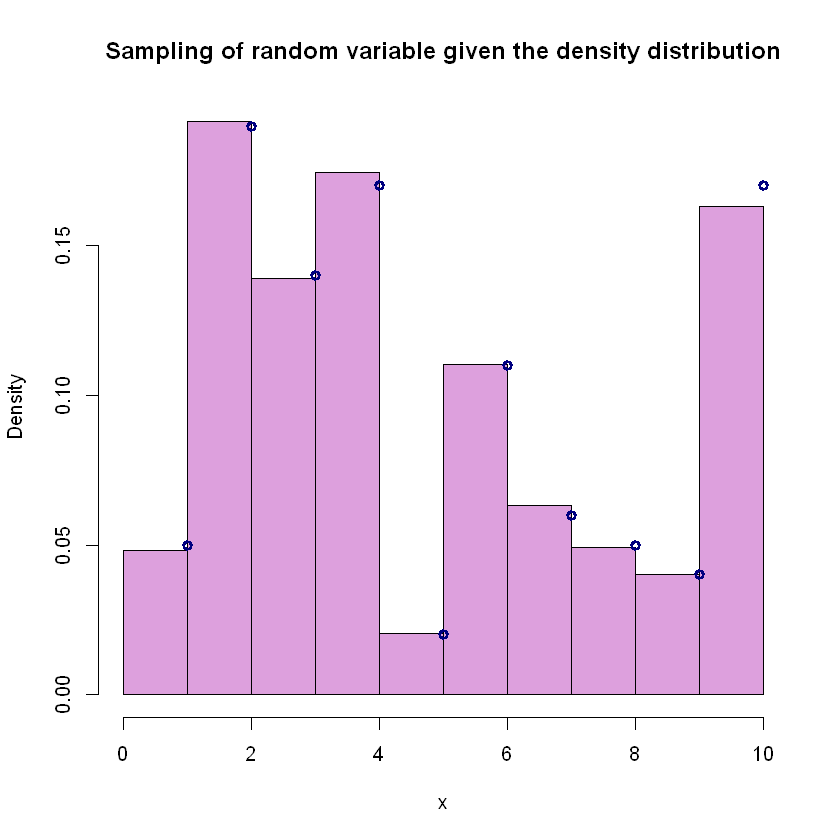

In [16]:
hist(rand, breaks = seq(0,10, 1),  freq=FALSE ,
col="plum", xlim=c(0, 10), xlab="x",
main="Sampling of random variable given the density distribution")
points(prob, col="navy", lt=3, lw=3, add=TRUE)

## Exercise 3
Generate random variables from the following distribution

$f(X) = \frac{2}{\pi R^2} \sqrt{R^2 -X^2}$

where $-R \leq x \leq R$

a) using the acceptance-rejection algorithm, assume $ M = \frac{2}{(\pi R)}$ and generate $10^4$ random variables,plotting them in an histogram


In [17]:
#distribution function
f <- function(x, R){
    val <- ifelse((x >= -R & x<= R), (2/(pi * R**2))*sqrt(R**2 - x**2), 0)
    return (val)
}

In [18]:
#generate uniform u1
random <- function(n, R, f){
    u.1 <- runif(n, min = -R, max = R)
    u.2 <- runif(n, min = 0, max = 1)
    
    f.max <- 2/(pi * R)
    y <- ifelse(u.2 * f.max < f(u.1, R), u.1, NA)
    y.clean <- y[!is.na(y)]
    efficiency <- length(y.clean )/ length(y)
    print(c("The efficency of the model is=", efficiency))
    return(y.clean)
    }

In [19]:
R <- 5
n <- 10**4
val <- random(n, R, f)

[1] "The efficency of the model is=" "0.7806"                        


In [20]:
x <- seq(-R, R, by = 10**4)
val_real <- f(x, R)
df <- data.frame(x, val, val_real)

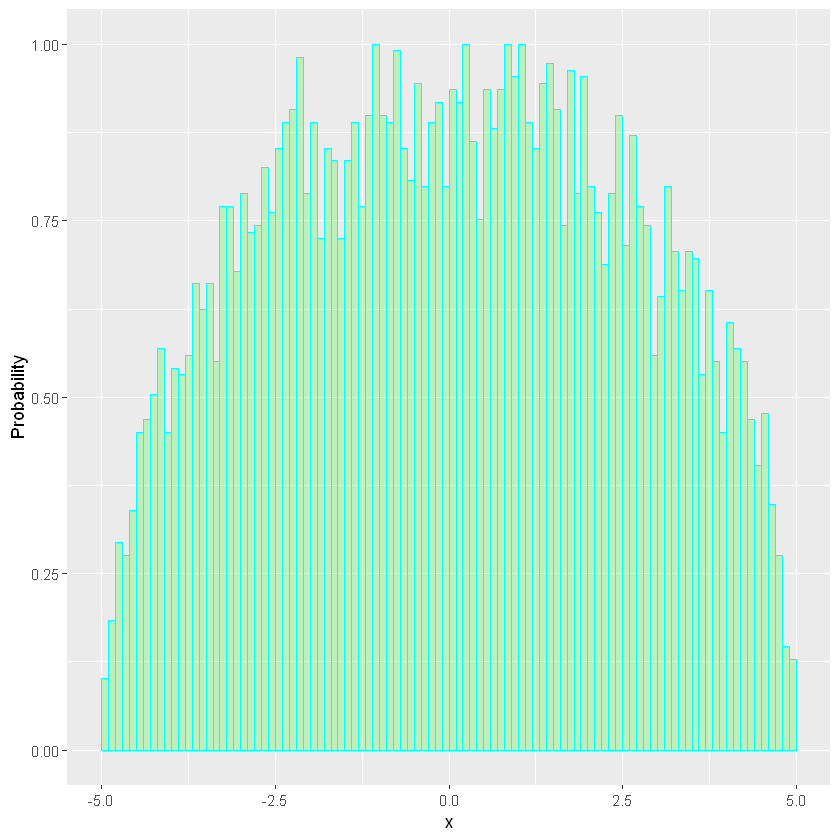

In [21]:
p<-ggplot(data.frame(val), aes(x=val, color=x)) 
p <- p + geom_histogram(aes(y = ..ncount..),breaks=seq(-5, 5, by = 0.1), col="cyan", fill="green", alpha = .2) + xlim(c(-5, 5))
p <- p +  labs( y="Probability", x = "x")
p

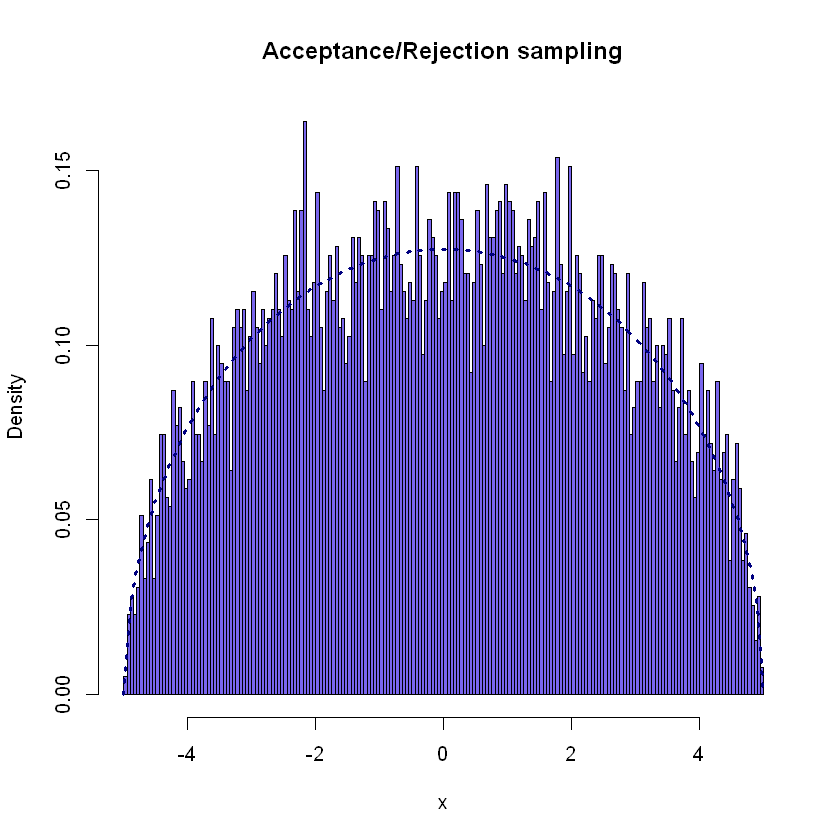

In [22]:
hist(val , breaks=seq(-5,5,0.05), freq=FALSE ,
col="slateblue2", xlim=c(-5, 5), xlab="x",
main="Acceptance/Rejection sampling")
curve(f(x,R), col="navy", lt=3, lw=3, add=TRUE)


## Exercise 4

An important property of the gamma distribution is the so-called reproductive property given a sequence of independent random variable $X_j \sim Gamma(\alpha_j;\beta)$, it follows that

$Y = \sum_{j=1}^n X_j \Rightarrow Y \sim Gamma(\alpha, \beta)$

where $\alpha = \sum_{j=1}^n \alpha_j$

if $\alpha = m$ is an integer, a random variable from gamma distribution $Gamma(m; \beta)$ (also known
as Erlang distribution) can be obtained by summing m independent exponential random variables $X_j \sim Exp(\beta)$:

$Y = \beta \sum_{j=1}^n (-ln U_j) = -\beta ln \prod_{j=1}^n U_j$

a) write an algorithm to sample variables from an Erlang distribution $Gamma(m, \beta)$


In [45]:
#Erlang distribution 
erlang <- function(k, lambda){
    prod <- 1 
    for (i in 1:k){
            U <- runif(i)       
            prod <- prod * (1 - U[i])
                }
    Y <-  - (lambda) * log(prod)
    return (Y)
    }

In [46]:
k <- 10
lambda <-1
val <- c()
N <- 1000
for (i in 1:1000){
    er <- erlang(k, lambda)
    val <- append(val, erlang(k, lambda ))}

Warning message:
"Removed 6 rows containing non-finite values (stat_bin)."

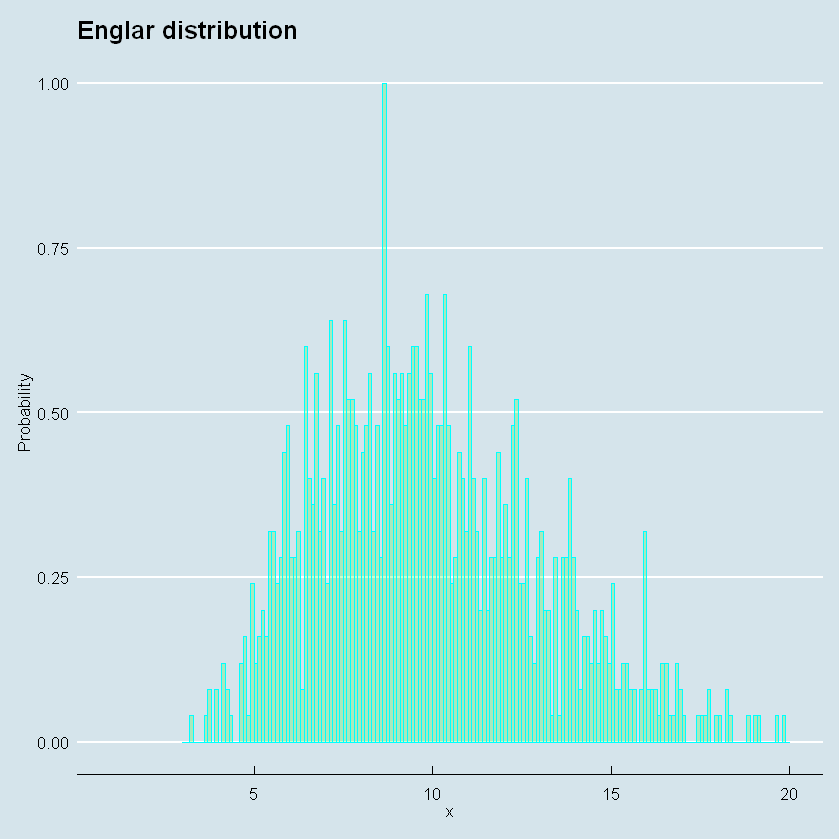

In [50]:
p<-ggplot(data.frame(val), aes(x=val, color=x)) 
p <- p + geom_histogram(aes(y = ..ncount..),breaks=seq(3, 20, by = 0.1), col="cyan", fill="green", alpha = .2) + xlim(c(1, 20))
p <- p +  labs( y="Probability", x = "x") 
p <- p +ggtitle("Englar distribution")+ theme_economist() + scale_color_economist()
p <- p 
p

In [26]:
derlang <- function(x, k, l=1) {
    f <- dgamma(x, k, l)
    f
}

In [27]:
x <- seq(1, 10)
derlang(x, 10)

[1] 1.013777e-06 1.909493e-04 2.700504e-03 1.323119e-02 3.626558e-02
 [6] 6.883849e-02 1.014047e-01 1.240769e-01 1.317556e-01 1.251100e-01

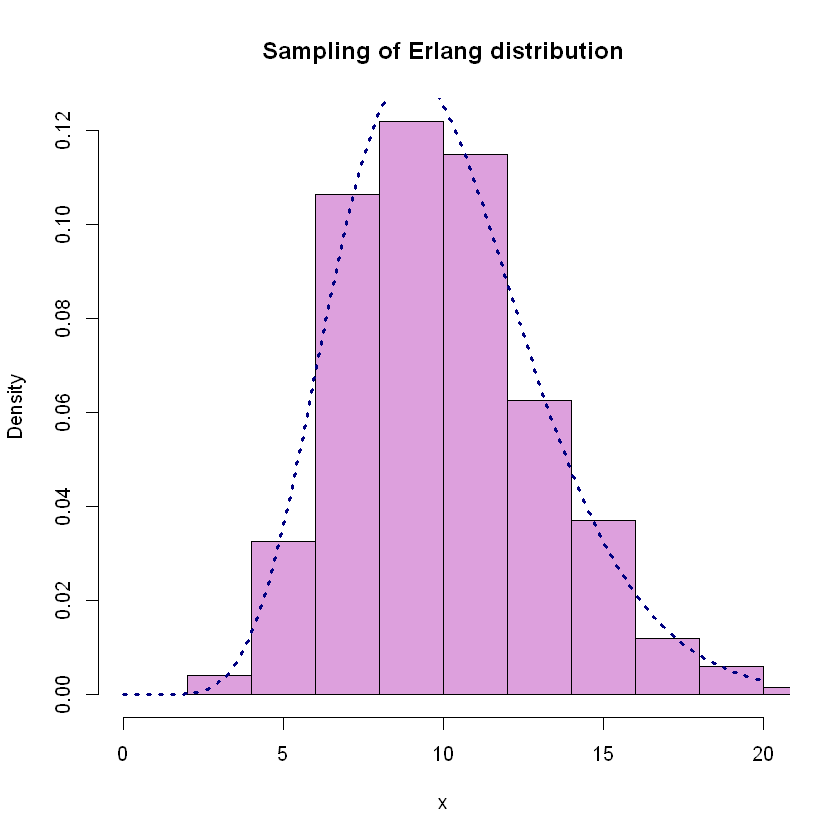

In [28]:
hist(val,  freq=FALSE ,
col="plum", xlim=c(0, 20), xlab="x",
main="Sampling of Erlang distribution")
curve(derlang(x, 10),col="navy", lt=3, lw=3, add=TRUE)

In [29]:
k <- 1
lambda <-1
val2 <- c()
N <- 1000
for (i in 1:1000){
    er <- erlang(k, lambda)
    val2 <- append(val2, er )}

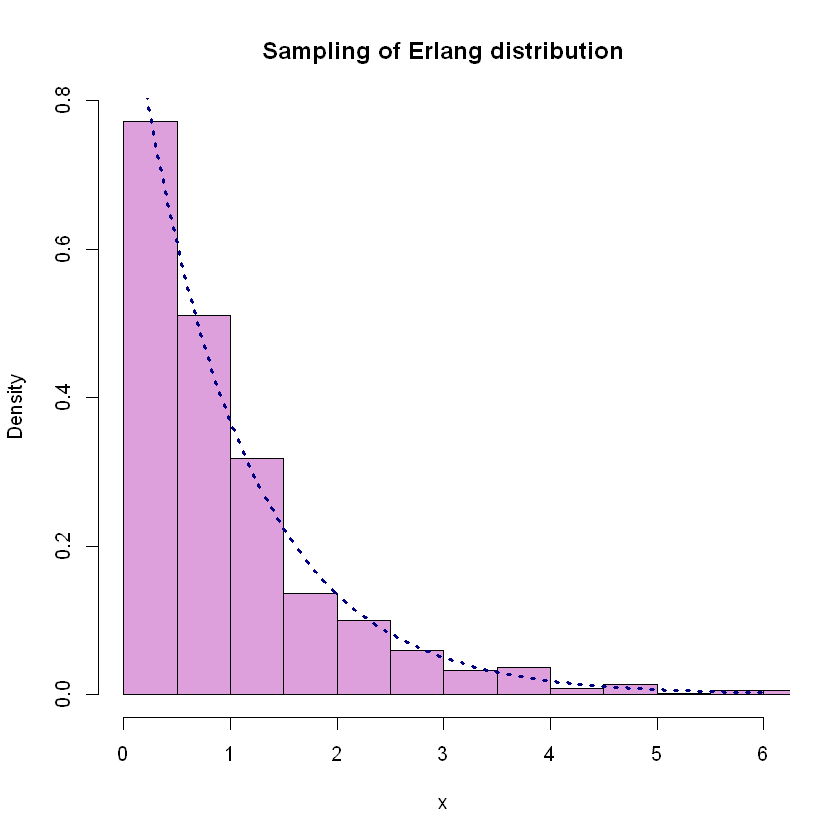

In [30]:
hist(val2,  freq=FALSE ,
col="plum", xlim=c(0, 6), xlab="x",
main="Sampling of Erlang distribution")
curve(derlang(x, 1), col="navy", lt=3, lw=3, add=TRUE)

In [31]:
k <- 100
lambda <-1
val2 <- c()
N <- 1000
for (i in 1:1000){
    er <- erlang(k, lambda)
    val2 <- append(val2, er )}

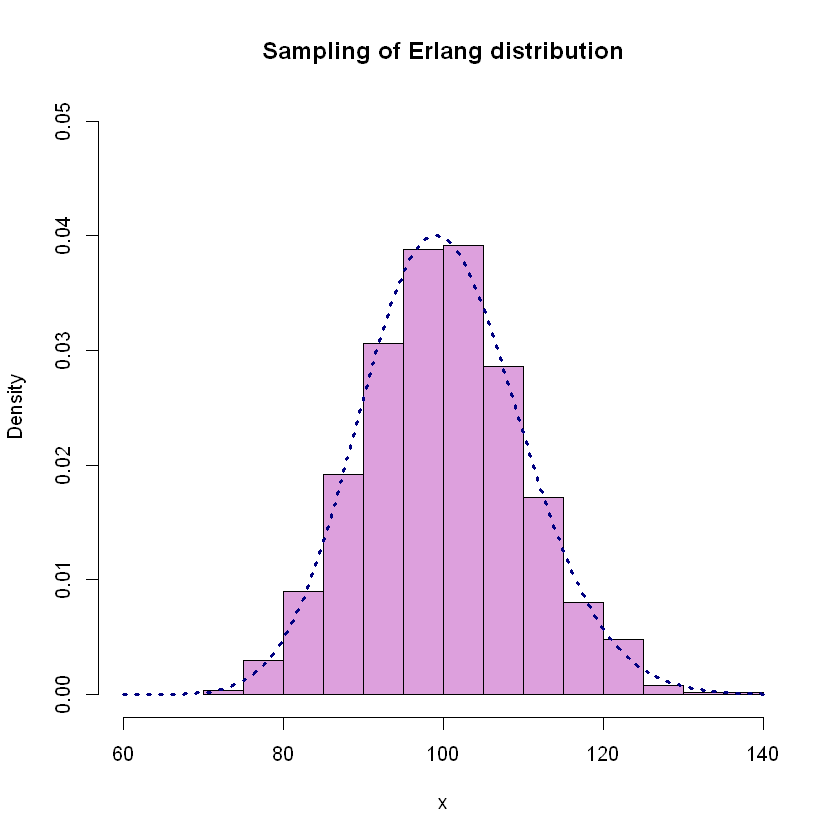

In [32]:
hist(val2,  freq=FALSE ,
col="plum", xlim=c(60, 140), xlab="x", ylim = c(0, 0.05),
main="Sampling of Erlang distribution")
curve(derlang(x, 100), col="navy", lt=3, lw=3, add=TRUE)

## Exercise 5
One of the first random number generator was proposed by von Neumann, the so-called  $\textit{middle square algorithm}$.

Write R code to implement this type of generator and, given a fixed digit number input, square it an remove the leading and trailing digits, in order to return a number with the same number of digits as the original number

Suggestion : after having squared the number, convert it to a list of characters 

(number <- unlist(strsplit(as.character(x.squared),"")))

and, after having removed the head and tail of the list, convert it back to a number 

(as.numeric(paste(number.after.trimming, collapse="")))

In [33]:
getNext <- function(x, d){
    
    #we square the value
    x.2 <- x**2
    
    #count
    temp <- as.numeric(unlist(strsplit(as.character(x.2), "")))

    #split
    temp_x <- length(temp)
    diff_x <- 2 * d - temp_x

    
    dn <- ceiling(d/2)    
    ifelse(diff_x == 0, temp<- temp, temp <- c(rep(0, diff_x), temp))
    temp_n <- length (temp)
    
    #removed the head and tail of the list,
    NEXT <- temp[-c(1:dn, ((temp_n-dn+1):temp_n))]
    
    #convert it to number
    return(as.numeric(paste(NEXT, collapse="")))
    }

Neuman <- function(x, n){
    #n is the number of iteration
    #x is the seed
    
    #we generate a vector for the values.
    rx <- c()
    #in order to obtain the number of digits 
    d <- max(2, length(unlist(strsplit(as.character(x), ""))))

    rx[1] <- x
    for (i in 2:(n+1)) {rx[i] <-getNext(rx[i-1], d)}
    return(rx)
    
}

In [34]:
Neuman(11, 5)

[1] 11 12 14 19 36 29

In [35]:
Neuman(97362, 115)

[1] 97362  9359  7590  7608  7881  2110  4452  9820  6432  1370  1876  3519
 [13]  2383  5678  2239  5013  5130  6316  9891  7831  1324  1752  3069  9418
 [25]  8698  5655  1979  3916  5335  8462  1605  2576  6635  4023  6184  8241
 [37]  7914  2631  6922  7914  2631  6922  7914  2631  6922  7914  2631  6922
 [49]  7914  2631  6922  7914  2631  6922  7914  2631  6922  7914  2631  6922
 [61]  7914  2631  6922  7914  2631  6922  7914  2631  6922  7914  2631  6922
 [73]  7914  2631  6922  7914  2631  6922  7914  2631  6922  7914  2631  6922
 [85]  7914  2631  6922  7914  2631  6922  7914  2631  6922  7914  2631  6922
 [97]  7914  2631  6922  7914  2631  6922  7914  2631  6922  7914  2631  6922
[109]  7914  2631  6922  7914  2631  6922  7914  2631